In [1]:
#Checking the version of Python

from platform import python_version
print(python_version())

3.8.3


## 1. Data Acquisition

In [2]:
# Import required packages to start
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-bright')

In [3]:
#creating the raw pandas dataframe
df = pd.read_csv("C:/Users/bozor/Documents/WGU MSDA/Data Mining I/medical_clean.csv")
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


## 2. Exploring the Data

In [4]:
#Checking dataset general info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

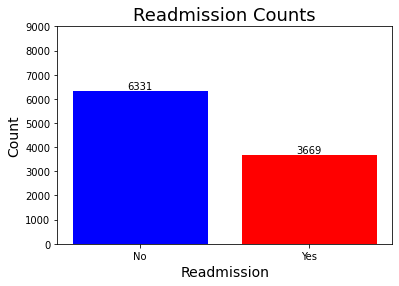

In [5]:
#Patients' Readmission After a Month

groups = df.ReAdmis.value_counts().tolist()
counts = df.ReAdmis.unique().tolist()

fig, ax = plt.subplots()
rect = ax.bar(counts, groups, color=['b', 'r'])
ax.set_ylim(0,9000)
ax.set_ylabel('Count', fontsize=14)
ax.set_xlabel('Readmission', fontsize=14)
ax.set_title('Readmission Counts', fontsize=18)
ax.bar_label(rect)
plt.savefig("fig01.jpg")
plt.show()

In [6]:
# Readmission Rate

readmis_rate = round(len(df[df['ReAdmis'] == 'Yes']) / len(df), 2)
print(readmis_rate)

0.37


In [7]:
#The features in the dataframe
df.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'ReAdmis',
       'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp',
       'Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke',
       'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes',
       'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis',
       'Reflux_esophagitis', 'Asthma', 'Services', 'Initial_days',
       'TotalCharge', 'Additional_charges', 'Item1', 'Item2', 'Item3', 'Item4',
       'Item5', 'Item6', 'Item7', 'Item8'],
      dtype='object')

In [8]:
#eliminating variables that have no importance in our analysis

column = ['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 
          'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone','Job'
         ]

new_df = df.drop(columns=column)
new_df.head()

,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,53,86575.93,Divorced,Male,No,19.141466,6,0,0,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,3,51,46805.99,Married,Female,No,18.940352,4,2,1,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,53,14370.14,Widowed,Female,No,18.057507,4,1,0,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,0,78,39741.49,Married,Male,No,16.576858,4,1,0,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,1,22,1209.56,Widowed,Female,No,17.439069,5,0,2,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [9]:
#List of remaining features
new_df.columns

Index(['Children', 'Age', 'Income', 'Marital', 'Gender', 'ReAdmis',
       'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp',
       'Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke',
       'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes',
       'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis',
       'Reflux_esophagitis', 'Asthma', 'Services', 'Initial_days',
       'TotalCharge', 'Additional_charges', 'Item1', 'Item2', 'Item3', 'Item4',
       'Item5', 'Item6', 'Item7', 'Item8'],
      dtype='object')

## 3. Data Wrangling

In [10]:
#Creating two lists, containing continuous and categorical variables

cont_var = ['Children', 'Age', 'Income','VitD_levels', 'Doc_visits', 'Full_meals_eaten',
            'vitD_supp', 'Initial_days', 'TotalCharge', 'Additional_charges', 'Item1',
            'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8']
cat_var = [i for i in new_df.columns if i not in cont_var]

print('Continuous variables are:\n\n {} \n\n and Categorical variables are:\n\n {}'.format(cont_var, cat_var))

Continuous variables are:

 ['Children', 'Age', 'Income', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp', 'Initial_days', 'TotalCharge', 'Additional_charges', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'] 

 and Categorical variables are:

 ['Marital', 'Gender', 'ReAdmis', 'Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke', 'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma', 'Services']


In [11]:
# creating dummy variables for all categorical features 

cleaned_df = pd.get_dummies(new_df, drop_first=True)
cleaned_df.rename(columns={'ReAdmis_Yes':'ReAdmis'}, inplace=True)
cleaned_df.head()

,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Initial_days,TotalCharge,Additional_charges,...,Diabetes_Yes,Hyperlipidemia_Yes,BackPain_Yes,Anxiety_Yes,Allergic_rhinitis_Yes,Reflux_esophagitis_Yes,Asthma_Yes,Services_CT Scan,Services_Intravenous,Services_MRI
0,1,53,86575.93,19.141466,6,0,0,10.585770,3726.702860,17939.403420,...,1,0,1,1,1,0,1,0,0,0
1,3,51,46805.99,18.940352,4,2,1,15.129562,4193.190458,17612.998120,...,0,0,0,0,0,1,0,0,1,0
2,3,53,14370.14,18.057507,4,1,0,4.772177,2434.234222,17505.192460,...,1,0,0,0,0,0,0,0,0,0
3,0,78,39741.49,16.576858,4,1,0,1.714879,2127.830423,12993.437350,...,0,0,0,0,0,1,1,0,0,0
4,1,22,1209.56,17.439069,5,0,2,1.254807,2113.073274,3716.525786,...,0,1,0,0,1,0,0,1,0,0


In [12]:
# Saving the cleaned dataset into a csv file.

cleaned_df.to_csv('cleaned_dataset.csv', index=False)

In [13]:
#Seaparating independent and dependent variables

X = cleaned_df.drop(columns='ReAdmis')
y = cleaned_df[['ReAdmis']]
y = y.values.reshape(-1,)
print('X shape: {} \ny shape: {}'.format(X.shape, y.shape))

X shape: (10000, 43) 
y shape: (10000,)


## 4. Analysis

In [14]:
# Holding out 30% of the data for final evaluation

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=777, stratify=y )

In [15]:
# Grid Search the K_Neighbors model and fiiting the model to the training set

from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, recall_score

score = make_scorer(recall_score)

knn = KNN()
h_param = {'n_neighbors' : np.arange(1,100,5).tolist()}

cv = GridSearchCV(knn, param_grid=h_param, cv=10, scoring = score)

cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 6, 11, 16, 21, 26, 31, 36, 41, 46,
                                         51, 56, 61, 66, 71, 76, 81, 86, 91,
                                         96]},
             scoring=make_scorer(recall_score))

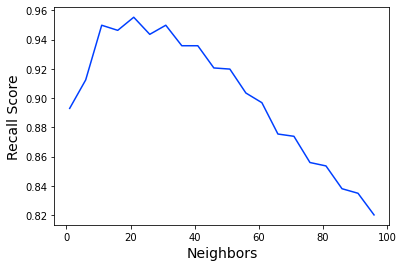

In [16]:
#Plotting the number of neighbors aginst the score

mts = cv.cv_results_['mean_test_score'].tolist()
plt.plot(np.arange(1,100,5).tolist(), mts)
plt.xlabel('Neighbors', fontsize=14)
plt.ylabel('Recall Score', fontsize=14)
plt.show()

In [17]:
#Selecting a shorter range of the Neighbors based on the result of last codes

knn = KNN()
h_param = {'n_neighbors' : np.arange(15,30).tolist()}

cv = GridSearchCV(knn, param_grid=h_param, cv=10, scoring=score)

cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                         25, 26, 27, 28, 29]},
             scoring=make_scorer(recall_score))

In [18]:
# Getting the best n_neighbors and the corresponding score:

print('The best hyper_parameter is {} with the recall score of {:.3f}.'.format(cv.best_params_, cv.best_score_ ))

The best hyper_parameter is {'n_neighbors': 15} with the recall score of 0.958.


In [19]:
# Classification report 

from sklearn.metrics import classification_report

y_pred = cv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred, labels=[1,0]))

              precision    recall  f1-score   support

           1       0.82      0.95      0.88      1101
           0       0.97      0.88      0.92      1899

    accuracy                           0.91      3000
   macro avg       0.89      0.92      0.90      3000
weighted avg       0.91      0.91      0.91      3000



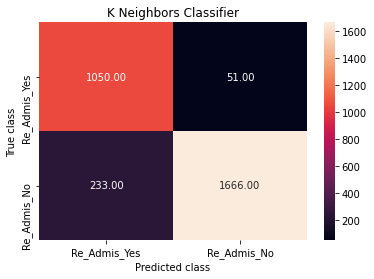

In [20]:
#Confusion Matrix

from sklearn.metrics import confusion_matrix


knn_cm = confusion_matrix(y_test, y_pred, labels=[1,0])
sns.heatmap(knn_cm, annot=True, fmt='.2f',xticklabels = ["Re_Admis_Yes", "Re_Admis_No"] , yticklabels = ["Re_Admis_Yes", "Re_Admis_No"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('K Neighbors Classifier')
plt.show()

In [21]:
# AUC score:

from sklearn.metrics import roc_auc_score

round(roc_auc_score(y_test, cv.best_estimator_.predict_proba(X_test)[:, 1]), 3)

0.969

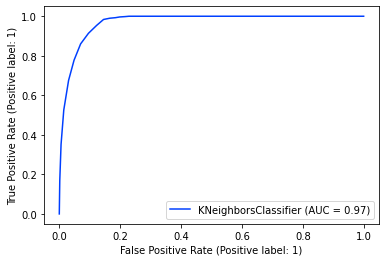

In [22]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(cv.best_estimator_, X_test, y_test)
plt.show()